In [ ]:
import cv2
import tensorflow.keras as keras
import tensorflow as tf
import math
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
import random
 
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
 
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation, DBSCAN, KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot

In [ ]:
len_single = 500
len_pair = 1000

In [ ]:
## belief vectors
BV1 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV2 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV3 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV4 = tf.Variable(np.random.randn(1, len_single), trainable = True)
BV12 = tf.Variable(np.random.randn(1,len_pair),trainable = True)
BV13 = tf.Variable(np.random.randn(1,len_pair ), trainable = True)
BV14 = tf.Variable(np.random.randn(1,len_pair), trainable = True)
BV23 = tf.Variable(np.random.randn(1,len_pair ), trainable = True)
BV24 = tf.Variable(np.random.randn(1,len_pair), trainable = True)
BV34 = tf.Variable(np.random.randn(1,len_pair ), trainable = True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
marker = '1_2'

In [ ]:
#saving
'''
for i in range(6):
    np.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  str(i) + marker + '.npy',keras.backend.get_value(l1[i]))
'''

"\nfor i in range(6):\n    np.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  str(i) + marker + '.npy',keras.backend.get_value(l1[i]))\n"

In [ ]:
#loading
 
BV1 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(0)+ '.npy'))
BV2= tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(1)+ '.npy'))
BV3 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(2)+ '.npy'))
BV4= tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(3)+ '.npy'))
 
BV12 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(4)+ '.npy'))
BV13 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(5)+ '.npy'))
 
BV14 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(6)+ '.npy'))
BV23 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(7)+ '.npy'))
 
 
BV24 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(8)+ '.npy'))
BV34 = tf.Variable(np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/' +  marker + str(9)+ '.npy'))

###position and velocity(inp as well as output)

In [ ]:
#pos1_t0,pos2_t0, vel1_t0, vel2_t0
def PP():
  inp1 = keras.layers.Input(shape = (len_pair, ))
  inp2 = keras.layers.Input(shape = (8, ))
  concat = keras.layers.Concatenate(axis = -1)([inp1, inp2])
  out = keras.layers.Dense(1000, activation = 'softplus')(concat)
  out = keras.layers.Dense(1000, activation = 'softplus')(out)
  out = keras.layers.Dense(500, activation = 'softplus')(out)
  out = keras.layers.Dense(500, activation = 'softplus')(out)
  out = keras.layers.Dense(100, activation = 'softplus')(out)
  out = keras.layers.Dense(100, activation = 'softplus')(out)
  out = keras.layers.Dense(100, activation = 'softplus')(out)
 
  post1 = keras.layers.Dense(25, activation = 'softplus')(out)
  post1 = keras.layers.Dense(12, activation = 'softplus')(post1)
  post1 = keras.layers.Dense(12, activation = 'softplus')(post1)
  post1 = keras.layers.Dense(6, activation = 'softplus')(post1)
  post1 = keras.layers.Dense(2)(post1)
 
 
  post2 = keras.layers.Dense(25, activation = 'softplus')(out)
  post2 = keras.layers.Dense(12, activation = 'softplus')(post2)
  post2 = keras.layers.Dense(12, activation = 'softplus')(post2)
  post2 = keras.layers.Dense(6, activation = 'softplus')(post2)
  post2 = keras.layers.Dense(2)(post2)
 
  vel2 = keras.layers.Dense(25, activation = 'softplus')(out)
  vel2 = keras.layers.Dense(12, activation = 'softplus')(vel2)
  vel2 = keras.layers.Dense(12, activation = 'softplus')(vel2)
  vel2 = keras.layers.Dense(6, activation = 'softplus')(vel2)
  vel2 = keras.layers.Dense(2)(vel2)
 
  vel1 = keras.layers.Dense(25, activation = 'softplus')(out)
  vel1 = keras.layers.Dense(12, activation = 'softplus')(vel1)
  vel1 = keras.layers.Dense(12, activation = 'softplus')(vel1)
  vel1 = keras.layers.Dense(6, activation = 'softplus')(vel1)
  vel1 = keras.layers.Dense(2)(vel1)
  
  model = keras.Model([inp1, inp2], [post1, post2, vel1, vel2])
  return model

In [ ]:
#pos1, vel
def SP():
  inp1 = keras.layers.Input(shape = (len_single, ))
  inp2 = keras.layers.Input(shape = (4, ))
  concat = keras.layers.Concatenate(axis = -1)([inp1, inp2])
  out = keras.layers.Dense(500, activation = 'softplus')(concat)
  out = keras.layers.Dense(500, activation = 'softplus')(out)
  out = keras.layers.Dense(100, activation = 'softplus')(out)
  out = keras.layers.Dense(100, activation = 'softplus')(out)
  out = keras.layers.Dense(50, activation = 'softplus')(out)
 
  post = keras.layers.Dense(25, activation = 'softplus')(out)
  post = keras.layers.Dense(12, activation = 'softplus')(post)
  post = keras.layers.Dense(12, activation = 'softplus')(post)
  post = keras.layers.Dense(6, activation = 'softplus')(post)
  post = keras.layers.Dense(2)(post)
 
  vel = keras.layers.Dense(25, activation = 'softplus')(out)
  vel = keras.layers.Dense(12, activation = 'softplus')(vel)
  vel = keras.layers.Dense(12, activation = 'softplus')(vel)
  vel = keras.layers.Dense(6, activation = 'softplus')(vel)
  vel = keras.layers.Dense(2)(vel)
  
  model = keras.Model([inp1, inp2], [post,vel])
  return model

In [ ]:
#[vel1,vel2,vel3,vel4]
def vel_aggregator():
  inp = keras.layers.Input(shape = (8, ))
  out = keras.layers.Dense(9)(inp)
  out = keras.layers.LeakyReLU(alpha = 0.5)(out)
  out = keras.layers.Dense(7)(out)
  out = keras.layers.LeakyReLU(alpha = 0.5)(out)
 
  vel = keras.layers.Dense(2)(out)
 
  model = keras.Model(inp, vel)
  return model

In [ ]:
#[pos1,pos2,pos3,pos4]
def pos_aggregator():
  inp = keras.layers.Input(shape = (8, ))
  out = keras.layers.Dense(9)(inp)
  out = keras.layers.LeakyReLU(alpha = 0.5)(out)
  out = keras.layers.Dense(7)(out)
  out = keras.layers.LeakyReLU(alpha = 0.5)(out)
 
  pos = keras.layers.Dense(2)(out)
 
  model = keras.Model(inp, pos)
  return model

In [ ]:
pair_pred = PP()
pair_pred.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 1008)         0           input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 1000)         1009000     concatenate[0][0]            

In [ ]:
self_pred = SP()
self_pred.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 500)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 504)          0           input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dense_27 (Dense)                (None, 500)          252500      concatenate_1[0][0]        

##DATA GENERATION

In [ ]:
 
#input
folder = '001011'
#/content/drive/My Drive/VIPUL COLAB AND DATA/vipul_data
#path = '/content/drive/My Drive/VIPUL COLAB AND DATA/'
arr = np.load('/content/drive/My Drive/VIPUL COLAB AND DATA/collision_and_pass_data/' + folder +'/1.npy')
pos_arr = arr[3:, 0:8]
vel_arr = [pos_arr[i+1]-pos_arr[i] for i in range(len(pos_arr) -1)]
vel_arr = np.asarray(vel_arr)
vel_arr = vel_arr*60
 
 
acc_arr = [vel_arr[i+1]-vel_arr[i] for i in range(len(vel_arr) -1 )]
acc_arr = np.asarray(acc_arr)
acc_arr = acc_arr*60

avg_vel_arr = [(vel_arr[i+1]+vel_arr[i])/2 for i in range(vel_arr.shape[0]-1)]
vel_arr = np.asarray(avg_vel_arr)
 
 
pos__1 = pos_arr[1 :-1,0:2]
pos__2 = pos_arr[1:-1, 2:4]
pos__3 = pos_arr[1:-1,4:6]
pos__4 = pos_arr[1:-1,6:8]
 
vel__1 = vel_arr[:, 0:2]
vel__2 = vel_arr[:, 2:4]
vel__3 = vel_arr[:, 4:6]
vel__4 = vel_arr[:, 6:8]
 
acc__1 =acc_arr[ :,0:2]
acc__2 = acc_arr[:, 2:4]
acc__3 = acc_arr[:,4:6]
acc__4 = acc_arr[:,6:8]
 
print(acc__1.shape, pos__1.shape, acc__3.shape, pos__3.shape, pos_arr.shape, acc_arr.shape, vel__1.shape)
print(arr[0:4])

(1798, 2) (1798, 2) (1798, 2) (1798, 2) (1800, 8) (1798, 8) (1798, 2)
[[ 0.          0.          1.          0.          1.          1.
   2.          2.          2.          2.          2.          2.        ]
 [24.          2.          3.         22.          2.         21.
   0.          0.          0.          0.          0.          0.        ]
 [ 6.20361599  3.10589334  2.57742666  7.37305449  1.          1.
   1.          1.          1.          1.          1.          1.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]


In [ ]:
def beliefVectors(n):
  var1 = []
  var2 = []
  var3 = []
  var4 = []
  var12 = []
  var13 = []
  var14 = []
  var23 = []
  var24 = []
  var34 = []
  
  for i in range(n):
    var1.append(BV1)
    var2.append(BV2)
    var3.append(BV3)
    var4.append(BV4)
    var12.append(BV12)
    var13.append(BV13)
    var14.append(BV14)
    var23.append(BV23)
    var24.append(BV24)
    var34.append(BV34)
  
  variable1 = tf.concat(var1, axis = 0)
  variable2 = tf.concat(var2, axis = 0)
  variable3 = tf.concat(var3, axis = 0)
  variable4 = tf.concat(var4, axis = 0)
  variable12 = tf.concat(var12, axis = 0)
  variable13 = tf.concat(var13, axis = 0)
  variable14 = tf.concat(var14, axis = 0)
  variable23 = tf.concat(var23, axis = 0)
  variable24 = tf.concat(var24, axis = 0)
  variable34 = tf.concat(var34, axis = 0)
  
  """for i in range(n-1):
    variable1 = tf.concat((variable1, tf.convert_to_tensor(BV1)), axis =0)"""
  return [variable1, variable2, variable3, variable4, variable12, variable13, variable14, variable23, variable24, variable34]

In [ ]:
print(BV12, BV13, BV14)

<tf.Variable 'Variable:0' shape=(1, 1000) dtype=float64, numpy=
array([[-1.10411399e+00,  1.11574320e+00,  1.06866975e+00,
         1.14507570e+00,  6.94799688e-01,  8.19331412e-01,
         2.87954167e-01, -5.35026482e-01,  1.06954251e-01,
        -1.04549687e+00, -5.28408203e-01, -5.12291835e-01,
        -2.42125650e+00, -4.11054227e-01,  1.37159405e+00,
         1.87376607e-01,  9.77522916e-02, -1.42457338e+00,
         7.82012758e-01,  3.68809496e-01,  4.72179238e-01,
        -1.01541797e+00, -6.11254729e-01, -1.33746329e+00,
        -8.31127055e-01, -1.06126325e+00, -8.84061583e-01,
        -1.72975364e-01,  9.73085937e-01,  1.06786956e+00,
         3.62540973e-01, -1.47410391e+00, -5.06294452e-02,
        -1.64602676e-01, -5.08804842e-01,  6.40462358e-01,
        -1.44418430e+00, -1.21301694e+00,  4.92713655e-02,
         4.39630703e-01, -2.05321831e+00,  6.96974896e-01,
        -3.15158231e-01, -1.49318235e+00, -1.10820837e+00,
         1.91960239e+00, -5.67458063e-01,  2.000051

### Main model

In [ ]:
def model():
   inp_pos_1_t0 = keras.layers.Input(shape = (2))
   inp_pos_2_t0 = keras.layers.Input(shape = (2))
   inp_pos_3_t0 = keras.layers.Input(shape = (2))
   inp_pos_4_t0 = keras.layers.Input(shape = (2))
   
 
   inp_vel_1_t0 = keras.layers.Input(shape = (2))
   inp_vel_2_t0 = keras.layers.Input(shape = (2))
   inp_vel_3_t0 = keras.layers.Input(shape = (2))
   inp_vel_4_t0 = keras.layers.Input(shape = (2))
   
 
   BeV1 = keras.layers.Input(shape=(len_single, ))
   BeV2 = keras.layers.Input(shape=(len_single, ))
   BeV3 = keras.layers.Input(shape=(len_single, ))
   BeV4 = keras.layers.Input(shape=(len_single, ))
   BeV12 = keras.layers.Input(shape=(len_pair, ))
   BeV13 = keras.layers.Input(shape=(len_pair, ))
   BeV14 = keras.layers.Input(shape=(len_pair, ))
   BeV23 = keras.layers.Input(shape=(len_pair, ))
   BeV24 = keras.layers.Input(shape=(len_pair, ))
   BeV34 = keras.layers.Input(shape=(len_pair, ))
   
   #######self_prediction################
   ## self prediction of ball1
   ## [pos_1_t0, vel_1_t0]  -> [pos_1, vel_1]
   inp_sp_ball_1 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_1_t0, inp_vel_1_t0])
   sp_ball_1 = self_pred([BeV1, inp_sp_ball_1])
   sp1_pos_ball_1 = sp_ball_1[0]      ## sp_pos/vel_ball_ballno.
   sp1_vel_ball_1 = sp_ball_1[1]
 
   ## self prediction of ball2
   ## [pos_2_t0, vel_2_t0]  -> [pos_2, vel_2]
   inp_sp_ball_2 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_2_t0, inp_vel_2_t0])
   sp_ball_2 = self_pred([BeV2, inp_sp_ball_2])
   sp2_pos_ball_2 = sp_ball_2[0]
   sp2_vel_ball_2 = sp_ball_2[1]
 
   ## self prediction of ball3
   ## [pos_3_t0, vel_3_t0]  -> [pos_3, vel_3]
   inp_sp_ball_3 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_3_t0, inp_vel_3_t0])
   sp_ball_3 = self_pred([BeV3, inp_sp_ball_3])
   sp3_pos_ball_3 = sp_ball_3[0]
   sp3_vel_ball_3 = sp_ball_3[1]
 
   ## self prediction of ball4
   ## [pos_4_t0, vel_4_t0]  -> [pos_4, vel_4]
   inp_sp_ball_4 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_4_t0, inp_vel_4_t0])
   sp_ball_4 = self_pred([BeV4, inp_sp_ball_4])
   sp4_pos_ball_4 = sp_ball_4[0]
   sp4_vel_ball_4 = sp_ball_4[1]
 
   ####################pair Prediction#####################
   ############ 1-2
   #[pos_1, pos_2, vel_1, vel_2]  -> [pos_1, pos_2, vel_1, vel_2]
   inp_pp_ball_12 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_1_t0, inp_pos_2_t0, inp_vel_1_t0, inp_vel_2_t0])
   pp12 = pair_pred([BeV12, inp_pp_ball_12])
   pp12_pos_ball_1 = pp12[0]
   pp12_pos_ball_2 = pp12[1]
   pp12_vel_ball_1 = pp12[2]
   pp12_vel_ball_2 = pp12[3]
 
   ############ 1-3
   #[pos_1, pos_3, vel_1, vel_3]  -> [pos_1, pos_3, vel_1, vel_3]
   inp_pp_ball_13 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_1_t0, inp_pos_3_t0, inp_vel_1_t0, inp_vel_3_t0])
   pp13 = pair_pred([BeV13, inp_pp_ball_13])
   pp13_pos_ball_1 = pp13[0]
   pp13_pos_ball_3 = pp13[1]
   pp13_vel_ball_1 = pp13[2]
   pp13_vel_ball_3 = pp13[3]
   
   ############ 1-4
   #[pos_1, pos_4, vel_1, vel_4]  -> [pos_1, pos_4, vel_1, vel_4]
   inp_pp_ball_14 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_1_t0, inp_pos_4_t0, inp_vel_1_t0, inp_vel_4_t0])
   pp14 = pair_pred([BeV14, inp_pp_ball_14])
   pp14_pos_ball_1 = pp14[0]
   pp14_pos_ball_4 = pp14[1]
   pp14_vel_ball_1 = pp14[2]
   pp14_vel_ball_4 = pp14[3]
 
   ############ 2-3
   #[pos_2, pos_3, vel_2, vel_3]  -> [pos_2, pos_3, vel_2, vel_3]
   inp_pp_ball_23 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_2_t0, inp_pos_3_t0, inp_vel_2_t0, inp_vel_3_t0])
   pp23 = pair_pred([BeV23, inp_pp_ball_23])
   pp23_pos_ball_2 = pp23[0]
   pp23_pos_ball_3 = pp23[1]
   pp23_vel_ball_2 = pp23[2]
   pp23_vel_ball_3 = pp23[3]
 
   ############ 2-4
   #[pos_2, pos_4, vel_2, vel_4]  -> [pos_2, pos_4, vel_2, vel_4]
   inp_pp_ball_24 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_2_t0, inp_pos_4_t0, inp_vel_2_t0, inp_vel_4_t0])
   pp24 = pair_pred([BeV24, inp_pp_ball_24])
   pp24_pos_ball_2 = pp24[0]
   pp24_pos_ball_4 = pp24[1]
   pp24_vel_ball_2 = pp24[2]
   pp24_vel_ball_4 = pp24[3]
 
   ############ 3-4
   #[pos_3, pos_4, vel_3, vel_4]  -> [pos_3, pos_4, vel_3, vel_4]
   inp_pp_ball_34 = keras.layers.Lambda(lambda x : tf.concat(x, axis = -1))([inp_pos_3_t0, inp_pos_4_t0, inp_vel_3_t0, inp_vel_4_t0])
   pp34 = pair_pred([BeV34, inp_pp_ball_34])
   pp34_pos_ball_3 = pp34[0]
   pp34_pos_ball_4 = pp34[1]
   pp34_vel_ball_3 = pp34[2]
   pp34_vel_ball_4 = pp34[3]
 
   #vel aggregatoer
   #[vel1, vel2, vel3, vel4 ] - > vel
   vel_1 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp1_vel_ball_1, pp12_vel_ball_1, pp13_vel_ball_1, pp14_vel_ball_1])
   vel_2 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp2_vel_ball_2, pp12_vel_ball_2, pp23_vel_ball_2, pp24_vel_ball_2])
   vel_3 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp3_vel_ball_3, pp13_vel_ball_3, pp23_vel_ball_3, pp34_vel_ball_3])
   vel_4 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp4_vel_ball_4, pp14_vel_ball_4, pp24_vel_ball_4, pp34_vel_ball_4])
   
   #pos_aggregator
   # [pos1, pos2, pos3, pos4 ] - > pos
   pos_1 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp1_pos_ball_1, pp12_pos_ball_1, pp13_pos_ball_1, pp14_pos_ball_1])
   pos_2 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp2_pos_ball_2, pp12_pos_ball_2, pp23_pos_ball_2, pp24_pos_ball_2])
   pos_3 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp3_pos_ball_3, pp13_pos_ball_3, pp23_pos_ball_3, pp34_pos_ball_3])
   pos_4 = keras.layers.Lambda(lambda x : tf.math.scalar_mul(0.25,tf.math.add_n(x)))([sp4_pos_ball_4, pp14_pos_ball_4, pp24_pos_ball_4, pp34_pos_ball_4])
   
   
   
   m = keras.models.Model([inp_pos_1_t0,inp_pos_2_t0,inp_pos_3_t0,inp_pos_4_t0, inp_vel_1_t0, inp_vel_2_t0,inp_vel_3_t0, inp_vel_4_t0, BeV1,BeV2,BeV3, BeV4, BeV12, BeV13, BeV14, BeV23, BeV24, BeV34], [pos_1, pos_2, pos_3, pos_4,vel_1,vel_2,vel_3,vel_4]  )
   return m

In [ ]:
m = model()
m.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 2)]          0                                            
____________________________________________________________________________________________

In [ ]:
m = keras.models.load_model('/content/drive/My Drive/VIPUL COLAB AND DATA/m' + marker + '.hdf5')

In [ ]:
def loss_fn(output, next_output):
  loss_mag = 0
  loss_dir = 0
  for out, nex in zip(output, next_output):
    '''theta_out = tf.math.atan2(out[1], out[0])
    theta_nex = tf.math.atan2(nex[1], nex[0])
    diff_theta = (tf.cast(theta_out, dtype = tf.float64)-theta_nex)
    diff_theta_square = tf.math.square(diff_theta)'''
    loss_mag += tf.reduce_mean(tf.losses.mean_squared_error(out, nex)) 
    #loss_dir += 5*tf.reduce_mean(diff_theta_square)
  print(loss_mag, loss_dir)
  return loss_mag+loss_dir
 
'''nex_unit = nex/tf.math.sqrt(tf.math.reduce_sum(tf.math.square(nex), axis = -1, keepdims = True))
output_unit = out/tf.math.sqrt(tf.math.reduce_sum(tf.math.square(out), axis = -1, keepdims = True))
output_unit = tf.cast(output_unit, dtype= tf.float64)
 
dot = tf.math.multiply( output_unit, nex_unit)'''

'nex_unit = nex/tf.math.sqrt(tf.math.reduce_sum(tf.math.square(nex), axis = -1, keepdims = True))\noutput_unit = out/tf.math.sqrt(tf.math.reduce_sum(tf.math.square(out), axis = -1, keepdims = True))\noutput_unit = tf.cast(output_unit, dtype= tf.float64)\n \ndot = tf.math.multiply( output_unit, nex_unit)'

In [ ]:
 
 
def window_generator(start , finish):
    inp_pos_1_t0 = pos__1[start:finish, :]
    inp_pos_2_t0 = pos__2[start:finish, :]
    inp_pos_3_t0 = pos__3[start:finish, :]
    inp_pos_4_t0 = pos__4[start:finish, :]
    inp_vel_1_t0 = vel__1[start:finish, :]
    inp_vel_2_t0 = vel__2[start:finish, :]
    inp_vel_3_t0 = vel__3[start:finish, :]
    inp_vel_4_t0 = vel__4[start:finish, :]
 
    return [inp_pos_1_t0, inp_pos_2_t0, inp_pos_3_t0, inp_pos_4_t0, inp_vel_1_t0, inp_vel_2_t0, inp_vel_3_t0, inp_vel_4_t0]

In [ ]:
 
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
n_sec_train = 15
 
n_train = 60*n_sec_train
start_frame  = 0
 
for i in range(10000):
  print('iteration ;:::: ', i)
  with tf.GradientTape() as Tape:
    start_train = start_frame
    finish_train = start_train+n_train
    inp_pos_1_t0, inp_pos_2_t0, inp_pos_3_t0, inp_pos_4_t0, inp_vel_1_t0, inp_vel_2_t0, inp_vel_3_t0, inp_vel_4_t0 = window_generator(start_train, finish_train)
    start_train +=1
    finish_train+=1
    next_pos_1, next_pos_2, next_pos_3, next_pos_4, next_vel_1, next_vel_2, next_vel_3, next_vel_4 = window_generator(start_train, finish_train)
    
    next_output = [next_pos_1, next_pos_2, next_pos_3, next_pos_4, next_vel_1, next_vel_2,next_vel_3, next_vel_4]
 
    BeeV1, BeeV2, BeeV3, BeeV4, BeeV12, BeeV13, BeeV14, BeeV23, BeeV24, BeeV34 = beliefVectors(2)
 
    output_ = m([inp_pos_1_t0[0:1],inp_pos_2_t0[0:1], inp_pos_3_t0[0:1],inp_pos_4_t0[0:1], inp_vel_1_t0[0:1], inp_vel_2_t0[0:1], inp_vel_3_t0[0:1], inp_vel_4_t0[0:1], BV1, BV2, BV3, BV4, BV12, BV13, BV14, BV23, BV24, BV34])
    output = output_
    #pos1,pos2,pos3,pos4,vel1,vel2,vel3,vel4 = output
    print("train_loss : ")
    for j in range(1, n_train):
      output_ = m([inp_pos_1_t0[j:j+1],inp_pos_2_t0[j:j+1], inp_pos_3_t0[j:j+1],inp_pos_4_t0[j:j+1], inp_vel_1_t0[j:j+1], inp_vel_2_t0[j:j+1], inp_vel_3_t0[j:j+1], inp_vel_4_t0[j:j+1], BV1, BV2, BV3, BV4, BV12, BV13, BV14, BV23, BV24, BV34])
      for k in range(8):
        output[k] = tf.concat([output[k], output_[k]], axis = 0)
    loss = loss_fn(output, next_output)
  print(loss)
  grad = Tape.gradient(loss, [m.trainable_variables,BV1, BV2, BV3, BV4, BV12, BV13, BV14, BV23, BV24, BV34])
  print(grad[0][0])
  optimizer.apply_gradients(zip(grad[0], m.trainable_variables))
  lr = 0.0001
  
  BV1.assign_sub(lr*grad[1])
  BV2.assign_sub(lr*grad[2])
  BV3.assign_sub(lr*grad[3]) 
  BV4.assign_sub(lr*grad[4])
  BV12.assign_sub(lr*grad[5])
  BV13.assign_sub(lr*grad[6])
  BV14.assign_sub(lr*grad[7])
  BV23.assign_sub(lr*grad[8])
  BV24.assign_sub(lr*grad[9])
  BV34.assign_sub(lr*grad[10])
  
 
  ## plot
  '''npBV12 = keras.backend.get_value(BV12)
  npBV13 = keras.backend.get_value(BV13)
  npBV14 = keras.backend.get_value(BV14)
  npBV23 = keras.backend.get_value(BV23)
  npBV24 = keras.backend.get_value(BV24)
  npBV34 = keras.backend.get_value(BV34)
  npBV = np.concatenate((npBV12, npBV13, npBV13, npBV23, npBV24, npBV34))
  print(npBV)'''
  '''
  tsne = TSNE(n_components=3, verbose=1, perplexity=2, n_iter=3000)
  tsne_results = tsne.fit_transform(npBV)
  #plt.scatter(tsne_results[:,0], tsne_results[:,1], c = ['r', 'b', 'r', 'r', 'r', 'b'])
  #plt.show()
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
 
  x = tsne_results[:,0]
  y = tsne_results[:,1]
  z = tsne_results[:,2]
  ax.scatter(x, y, z,  c = ['r', 'b', 'r', 'r', 'r', 'b'], marker='o')
 
  ax.set_xlabel('X Label')
  ax.set_ylabel('Y Label')
  ax.set_zlabel('Z Label')
 
  plt.show()
  df = pd.DataFrame(tsne_results)
  fig = px.scatter_3d(df, x=0, y=1, z=2,color=['r', 'b', 'r', 'r', 'r', 'b'])
  fig.show()'''
 
  m.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + 'm' + marker + '.hdf5')
  l1 = [BV1, BV2, BV3, BV4, BV12, BV13,BV14, BV23, BV24, BV34]
  for i in range(10):
    np.save('/content/drive/My Drive/VIPUL COLAB AND DATA/' + marker + str(i)+'.npy',keras.backend.get_value(l1[i]))

iteration ;::::  0
train_loss : 
tf.Tensor(557.8972327333279, shape=(), dtype=float64) 0
tf.Tensor(557.8972327333279, shape=(), dtype=float64)
tf.Tensor(
[[-0.00426192 -0.00191738 -0.00836301 ... -0.00122728  0.00506016
   0.00273472]
 [ 0.03217348  0.00344675  0.02024749 ...  0.00317843  0.01048709
  -0.01620513]
 [-0.02605319 -0.00149332 -0.01062578 ... -0.00758212 -0.02076435
   0.00472539]
 ...
 [-0.09522586  0.02453737  0.02855594 ...  0.03747481 -0.01721044
   0.01605107]
 [-0.05421909  0.00076245  0.03688444 ... -0.0015354   0.02455992
  -0.00997575]
 [-0.03849496  0.00017587  0.01897698 ...  0.00078873  0.01186787
  -0.00613152]], shape=(504, 500), dtype=float32)
iteration ;::::  1
train_loss : 
tf.Tensor(586.5917214402299, shape=(), dtype=float64) 0
tf.Tensor(586.5917214402299, shape=(), dtype=float64)
tf.Tensor(
[[ 1.4662509e-02  1.7450938e-03  1.4309564e-02 ... -3.5091315e-04
   2.8566543e-03 -8.1490185e-03]
 [-3.0938575e-02 -1.8957579e-03 -2.3964517e-02 ... -1.3040041e-03
 

In [ ]:
m.save('/content/drive/My Drive/VIPUL PROJECT/m.hdf5')
l1 = [BV12, BV13,BV14, BV23, BV24, BV34]
for i in range(6):
  np.save('/content/drive/My Drive/VIPUL PROJECT/' + str(i)+'.npy',keras.backend.get_value(l1[i]))

In [ ]:
m = keras.models.load_model('/content/drive/My Drive/VIPUL PROJECT/m.hdf5')
l1 = [BV12, BV13,BV14, BV23, BV24, BV34]
for i in range(6):
  l1[i] = tf.Variable(np.load('/content/drive/My Drive/VIPUL PROJECT/' + str(i)+'.npy'))

FileNotFoundError: ignored

In [ ]:
## evaluation 
n_sec_test = 5
n_test = 60*n_sec_test
start_test = finish_train + 200
finish_test = start_test+n_test
inp_pos_1_t0, inp_pos_2_t0, inp_pos_3_t0, inp_pos_4_t0, inp_vel_1_t0, inp_vel_2_t0, inp_vel_3_t0, inp_vel_4_t0 = window_generator(start_test, finish_test)
start_test+=1
finish_test+=1
next_output = window_generator(start_test, finish_test)
BeeV1, BeeV2, BeeV3, BeeV4, BeeV12, BeeV13, BeeV14, BeeV23, BeeV24, BeeV34 = beliefVectors(n_test)
output = m([inp_pos_1_t0,inp_pos_2_t0, inp_pos_3_t0, inp_pos_4_t0, inp_vel_1_t0,inp_vel_2_t0,inp_vel_3_t0, inp_vel_4_t0, BeeV1, BeeV2, BeeV3, BeeV4, BeeV12, BeeV13, BeeV14, BeeV23, BeeV24, BeeV34])
loss = loss_fn(output, next_output)
print('evaluation loss : ', loss)
output = np.concatenate(output, axis = 1)
next_output = np.concatenate(next_output, axis = 1)
diff = output - next_output
for i in range(output.shape[0]):
  print(diff[i,:])


In [ ]:
l1 = [BV12, BV13,BV14, BV23, BV24, BV34]
i = 0
j = 1
for i in range(6):
  for j in range(i,6):
    print((i,j), tf.math.multiply(tf.convert_to_tensor(l1[i]), tf.convert_to_tensor(l1[j])))

In [ ]:
npBV12 = keras.backend.get_value(BV12)
npBV13 = keras.backend.get_value(BV13)
npBV14 = keras.backend.get_value(BV14)
npBV23 = keras.backend.get_value(BV23)
npBV24 = keras.backend.get_value(BV24)
npBV34 = keras.backend.get_value(BV34)
npBV = np.concatenate((npBV12, npBV13, npBV13, npBV23, npBV24, npBV34))
npBV.shape


(6, 1000)

###Cluster

In [ ]:
#  INFO
pairs = ["1-2", "1-3", "1-4", "2-3", "2-4", "3-4"]
space = "                "
print("index        ", "Ball pairs   ", "colliding status         ", "type of force        ", "Konstant of force")
for i in range(6):
  if (arr[0,i+6]==1):
    if (arr[1,i]) > 0:
      print(i, space ,pairs[i],space,  arr[0, i],space,  'Repulsive Gravitational', space,  arr[1,i])
    else: 
      print(i, space, pairs[i], space,  arr[0, i], space,  'attractive gravitational', space,  arr[1,i])
  else:
    print(i, space ,pairs[i],  space,  arr[0, i], space,  'spring', space, arr[1,i])

npBV12 = keras.backend.get_value(BV12)
npBV13 = keras.backend.get_value(BV13)
npBV14 = keras.backend.get_value(BV14)
npBV23 = keras.backend.get_value(BV23)
npBV24 = keras.backend.get_value(BV24)
npBV34 = keras.backend.get_value(BV34)
npBV = np.concatenate((npBV12, npBV13, npBV14, npBV23, npBV24, npBV34))
npBV.shape

index         Ball pairs    colliding status          type of force         Konstant of force
0                  1-2                  0.0                  spring                  24.0
1                  1-3                  0.0                  spring                  2.0
2                  1-4                  1.0                  spring                  3.0
3                  2-3                  0.0                  spring                  22.0
4                  2-4                  1.0                  spring                  2.0
5                  3-4                  1.0                  spring                  21.0


(6, 1000)

[3 0 2 0 2 1]


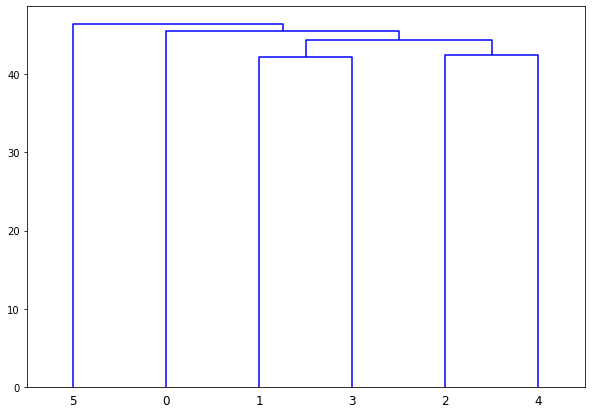

In [ ]:

X = npBV

cluster = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='average')
cluster.fit_predict(X)
print(cluster.labels_)


linked = linkage(X, 'ward')

labelList = range(0, 6)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

[0 1 1 1 1 2]


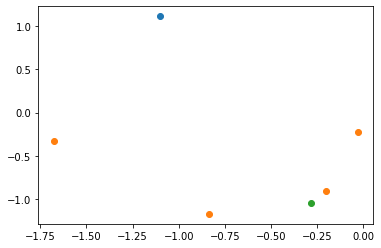

In [ ]:
8
model = AffinityPropagation(damping=0.8)
X = npBV
model.fit(X)

yhat = model.predict(X)
print(yhat)

clusters = unique(yhat)

for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

[-1 -1 -1 -1 -1 -1]


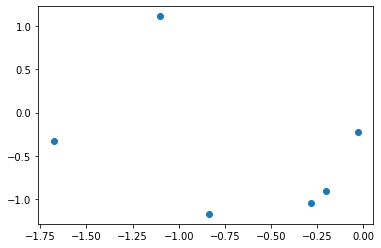

In [ ]:

x = npBV
model = DBSCAN(eps=0.9, min_samples=3)
yhat = model.fit_predict(X)
print(yhat)
clusters = unique(yhat)
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

[1 1 1 1 1 0]


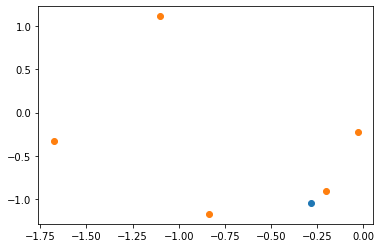

In [ ]:

X = npBV

model = KMeans(n_clusters=2)
model.fit(X)

yhat = model.predict(X)
print(yhat)
clusters = unique(yhat)
for cluster in clusters:
	row_ix = where(yhat == cluster)
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
pyplot.show()

In [ ]:

tsne = TSNE(n_components=3, verbose=1, perplexity=2, n_iter=3000)
tsne_results = tsne.fit_transform(npBV)

df = pd.DataFrame(tsne_results)
fig = px.scatter_3d(df, x=0, y=1, z=2,color=['r', 'b', 'r', 'r', 'r', 'b'])
fig.show()

#TRASH

In [ ]:
{"inp_pos_1_t0" : inp_pos_1_t0,"inp_pos_2_t0":inp_pos_2_t0, "inp_pos_3_t0":inp_pos_3_t0, "inp_pos_4_t0" :inp_pos_4_t0, "inp_vel_1_t0":inp_vel_1_t0, "inp_vel_2_t0":inp_vel_2_t0, "inp_vel_3_t0":inp_vel_3_t0, "inp_vel_4_t0":inp_vel_4_t0, "BeV1":BeV1, "BeV2":BeV2, "BeV3":BeV3,"BeV4":BeV4, "BeV12":BeV12, "BeV13":BeV13,"BeV14" :BeV14, "BeV23" :BeV23, "BeV24" :BeV24, "BeV34" :BeV34 })
    next_pos_1 = pos__1[start:finish, :]
    next_pos_2 = pos__2[start:finish, :]
    next_pos_3 = pos__3[start:finish, :]
    next_pos_4 = pos__4[start:finish, :]
    next_vel_1 = vel__1[start:finish, :]
    next_vel_2 = vel__2[start:finish, :]
    next_vel_3 = vel__3[start:finish, :]
    next_vel_4 = vel__4[start:finish, :]

    {"inp_pos_1_t0" :,"inp_pos_2_t0":, "inp_pos_3_t0":, "inp_pos_4_t0" :, "inp_vel_1_t0":, "inp_vel_2_t0":, "inp_vel_3_t0":, "inp_vel_4_t0":, "BeV1":, "BeV2":, "BeV3":,"BeV4":, "BeV12":, "BeV13":,"BeV14" :, "BeV23" :, "BeV24" :, "BeV34" : }
inp_pos_1_t0,inp_pos_2_t0, inp_pos_3_t0, inp_pos_4_t0, inp_vel_1_t0, inp_vel_2_t0, inp_vel_3_t0, inp_vel_4_t0, BeV1, BeV2, BeV3,BeV4, BeV12, BeV13,BeV14, BeV23, BeV24, BeV34

SyntaxError: ignored

In [ ]:
resnet = keras.applications.VGG16(include_top=False,weights="imagenet", input_shape=(50,125,3))
D1 = keras.layers.Dense(500, activation = 'sigmoid')

def model():
  inp1 = keras.layers.Input(shape=(50,125,3))
  inp2 = keras.layers.Input(shape=(50,125,3))

  out1 = resnet(inp1)
  out1 = keras.layers.Flatten()(out1)
  out1 = D1(out1)

  out2 = resnet(inp2)
  out2 = keras.layers.Flatten()(out2)
  out2 = D1(out2)
  
  model = keras.Model([inp1, inp2], [out1, out2])
  return model


def loss_fn(out_same, out_diff):
  loss_same = tf.reduce_mean(tf.math.square(tf.math.subtract(out_same[0] , out_same[1])))
  loss_diff = -tf.reduce_mean(tf.math.square(tf.math.subtract(out_diff[0] , out_diff[1])))
  loss = loss_diff + loss_same
  loss = 1/(1+np.exp(loss))
  return loss

optimizer = keras.optimizers.Adam(learning_rate = 0.001)
set1 = tf.convert_to_tensor(set1, dtype=tf.float32)
set2 = tf.convert_to_tensor(set2, dtype=tf.float32)
set3 = tf.convert_to_tensor(set3, dtype=tf.float32)
for i in range(100):
  with tf.GradientTape() as Tape:
    out_same = m([set1[0:1], set2[0:1]])
    out_diff = m([set1, set3])
    loss = loss_fn(out_same,  out_diff)
  grad = Tape.gradient(loss, m.trainable_variables)
  #grad=tf.clip_by_value(grad, -20, 20)
  print(grad)
  optimizer.apply_gradients(zip(grad, m.trainable_variables))

In [ ]:
math.degrees(math.atan2(-1,1))

-45.0

In [ ]:
t = tf.constant([[1,2], [1,2]])

In [ ]:
t.shape

TensorShape([2, 2])